Попытка создания классификатора базирующегося на результатах фитинга полиномом

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def polyfit(data, polynomialOrder=15):
    res_filter = data
    # Фитируем получившийся массив:
    xData = range(len(res_filter))
    yData = res_filter
    # curve fit the data
    fittedParameters = np.polyfit(xData, yData, polynomialOrder)
    xModel = np.linspace(min(xData), max(xData), len(xData))
    yModel = np.polyval(fittedParameters, xModel)

    return yModel, fittedParameters

In [3]:
gp_table = pd.read_table('./crab_gp_kaz_10_2016-2018_calib_7types.csv', sep='\t')

In [21]:
param_set = pd.DataFrame(columns=[f'param_{i}'  for i in range(10)])
param_set['type'] = None

In [22]:
for idx, _ in enumerate(gp_table['Date']):
    file = './results_by_08.05.2019/' + gp_table['fName'][idx][2:]
    profile = np.genfromtxt(file, skip_header=6)
    
    if len(profile) == 100:
        pass
    else:
        profile = np.append(profile, np.zeros(100 - len(profile)))
            
    profile = profile/np.max(profile)
    pol, param = polyfit(profile, 9)
    param_set.loc[idx] = [
        *param,
        int(gp_table['Type'][idx])
        ]

In [23]:
param_set

,param_0,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,type
0,-1.035116e-14,4.853296e-12,-9.548188e-10,1.020874e-07,-0.000006,0.000237,-0.004839,0.044238,-0.047353,-0.104427,6.0
1,-6.182543e-15,2.886756e-12,-5.639929e-10,5.961020e-08,-0.000004,0.000131,-0.002475,0.017374,0.064648,-0.119527,6.0
2,-8.700538e-15,4.047552e-12,-7.896243e-10,8.364674e-08,-0.000005,0.000190,-0.003793,0.032778,-0.004696,-0.137460,6.0
3,-9.053634e-15,4.179394e-12,-8.111771e-10,8.581421e-08,-0.000005,0.000198,-0.004055,0.037186,-0.030673,-0.124598,6.0
4,-6.737777e-15,3.151538e-12,-6.188132e-10,6.605758e-08,-0.000004,0.000152,-0.003071,0.026299,0.006358,-0.075897,6.0
...,...,...,...,...,...,...,...,...,...,...,...
2618,-6.727212e-15,3.223511e-12,-6.500793e-10,7.149765e-08,-0.000005,0.000179,-0.003864,0.040380,-0.130134,0.159197,4.0
2619,-1.149315e-14,5.239371e-12,-9.989360e-10,1.031459e-07,-0.000006,0.000222,-0.004456,0.043826,-0.148196,0.208608,4.0
2620,-3.425009e-15,1.569219e-12,-2.994505e-10,3.055303e-08,-0.000002,0.000055,-0.000685,-0.005169,0.172138,-0.321642,4.0
2621,-9.345274e-15,4.316345e-12,-8.374315e-10,8.836229e-08,-0.000005,0.000200,-0.004017,0.036393,-0.050527,-0.149748,4.0


In [24]:
corr = param_set.corr()
corr.style.background_gradient(cmap='coolwarm')

,param_0,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,type
param_0,1,-0.999032,0.995568,-0.988425,0.975711,-0.954262,0.91853,-0.856852,0.701026,0.422568,-0.54041
param_1,-0.999032,1,-0.998734,0.994091,-0.984212,0.965963,-0.933772,0.875834,-0.722858,-0.421559,0.547777
param_2,0.995568,-0.998734,1,-0.998281,0.991783,-0.977424,0.949647,-0.896508,0.747491,0.4197,-0.555698
param_3,-0.988425,0.994091,-0.998281,1,-0.997556,0.987972,-0.965755,0.918868,-0.775465,-0.416366,0.563966
param_4,0.975711,-0.984212,0.991783,-0.997556,1,-0.996323,0.9812,-0.942606,0.807424,0.410248,-0.571902
param_5,-0.954262,0.965963,-0.977424,0.987972,-0.996323,1,-0.994031,0.966686,-0.844156,-0.398315,0.577522
param_6,0.91853,-0.933772,0.949647,-0.965755,0.9812,-0.994031,1,-0.988382,0.886948,0.372468,-0.574814
param_7,-0.856852,0.875834,-0.896508,0.918868,-0.942606,0.966686,-0.988382,1,-0.939683,-0.30453,0.541517
param_8,0.701026,-0.722858,0.747491,-0.775465,0.807424,-0.844156,0.886948,-0.939683,1,0.0177133,-0.329334
param_9,0.422568,-0.421559,0.4197,-0.416366,0.410248,-0.398315,0.372468,-0.30453,0.0177133,1,-0.705911


In [25]:
X = param_set.drop(['type'], axis=1)
y = param_set['type']

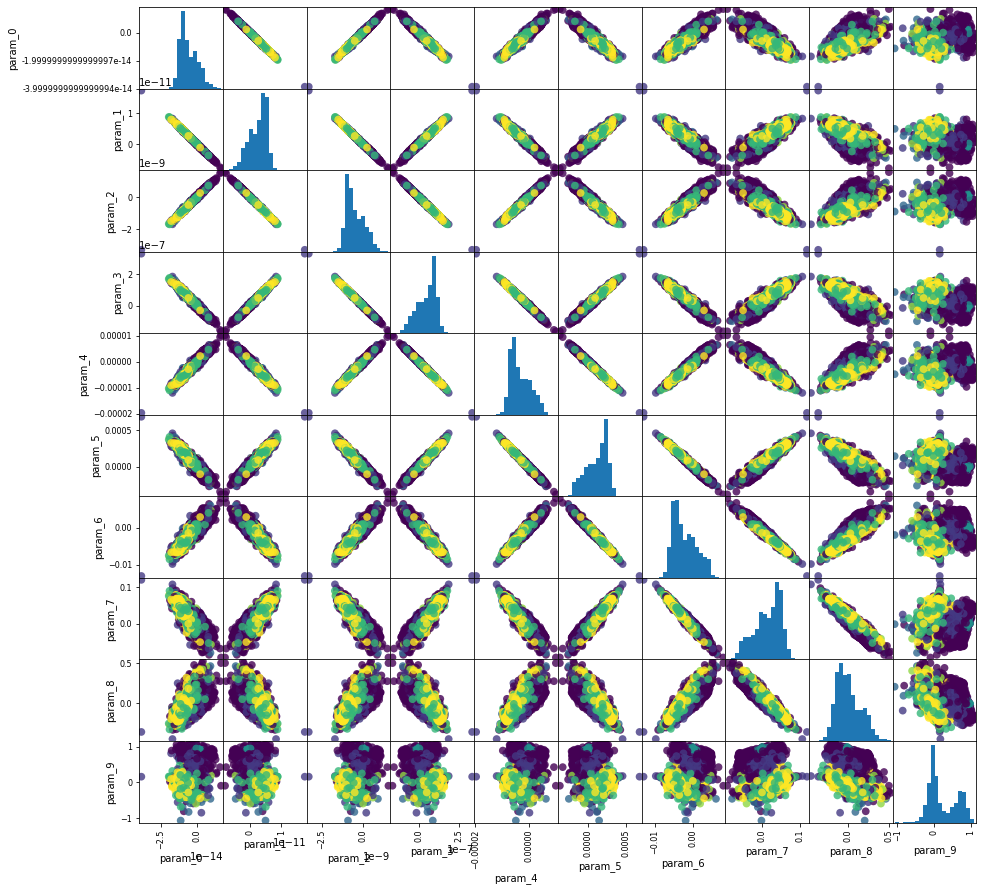

In [26]:
grr = pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.5895806861499364


In [29]:
clf = neighbors.KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.6048284625158831


In [30]:
data_pulse = param_set.where(param_set.type==1, axis=1).dropna()
data_noise = param_set.where(param_set.type==0, axis=1).dropna()

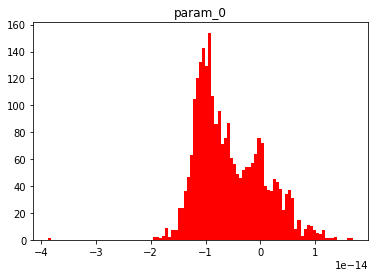

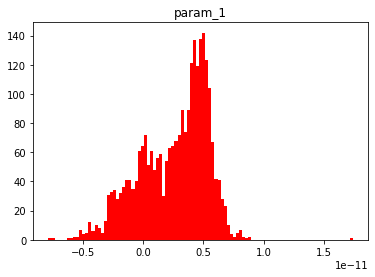

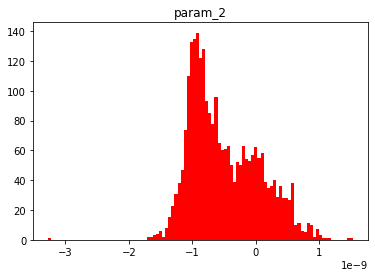

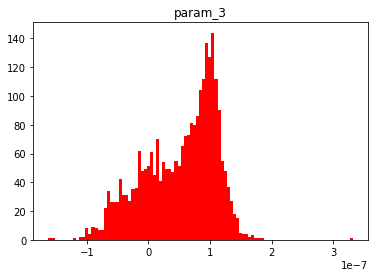

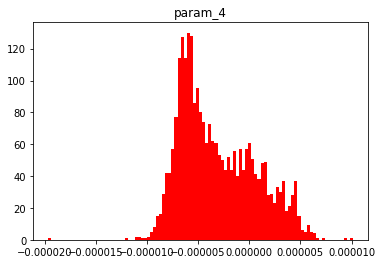

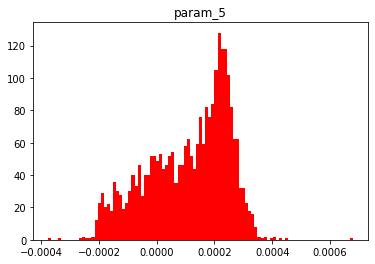

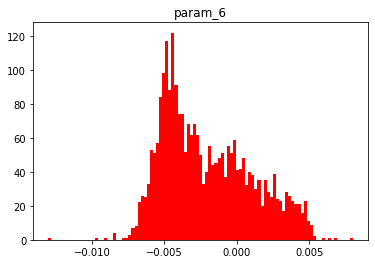

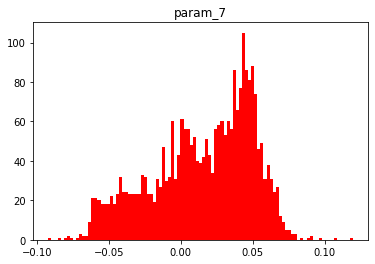

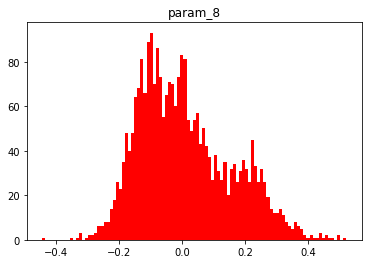

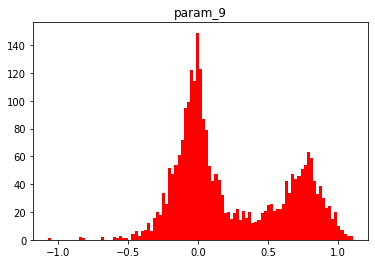

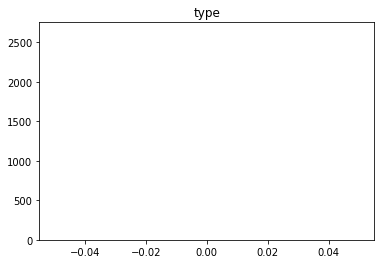

In [15]:
for lbl in data_pulse.columns:
    bins = np.linspace(min(param_set[lbl]), max(param_set[lbl]), 100)
    plt.close()
    plt.title(lbl)
    plt.hist([data_pulse[lbl ], data_noise[lbl]],
             bins=bins, stacked=True, color=['b', 'r'])
    plt.show()

3